In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score

In [117]:
df = pd.read_csv('/content/world-happiness-report-2021.csv')
df.shape

(149, 20)

In [118]:
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [119]:
# only using these columns

df = df[[
    "Country name",
    "Regional indicator",
    "Ladder score",
    "Standard error of ladder score",
    "upperwhisker",
    "lowerwhisker",
    "Logged GDP per capita",
    "Social support",
    "Healthy life expectancy",
    "Freedom to make life choices",
    "Generosity"
]]

In [120]:
df.isnull().sum()

,0
Country name,0
Regional indicator,0
Ladder score,0
Standard error of ladder score,0
upperwhisker,0
lowerwhisker,0
Logged GDP per capita,0
Social support,0
Healthy life expectancy,0
Freedom to make life choices,0


thier is no missing values

In [121]:
df.duplicated().sum()

0

their is no duplicate records

In [122]:
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175


In [123]:
df['Regional indicator'].value_counts()

,count
Regional indicator,
Sub-Saharan Africa,36
Western Europe,21
Latin America and Caribbean,20
Middle East and North Africa,17
Central and Eastern Europe,17
Commonwealth of Independent States,12
Southeast Asia,9
South Asia,7
East Asia,6


all countries are divided into 10 regions

In [124]:
region = 'North America and ANZ'
df[df['Regional indicator'] == region]['Country name']

,Country name
8,New Zealand
10,Australia
13,Canada
18,United States


# Univariate analysis

descriptive analysis

In [125]:
df.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000


checking correlation

In [126]:
df.select_dtypes(include=['float64', 'int64']).corr()['Ladder score']

,Ladder score
Ladder score,1.000000
Standard error of ladder score,-0.470787
upperwhisker,0.999347
lowerwhisker,0.999396
Logged GDP per capita,0.789760
Social support,0.756888
Healthy life expectancy,0.768099
Freedom to make life choices,0.607753
Generosity,-0.017799


Ladder score is highly depended on uppwisker , lowerwisker , gdp , social support , healthy life expectancy , freetom to make life choices

# bi-variate analysis

<ipython-input-127-2ae36c7356b8>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot( x = 'Regional indicator'  , y = 'Ladder score' , data = df  , ci = None)


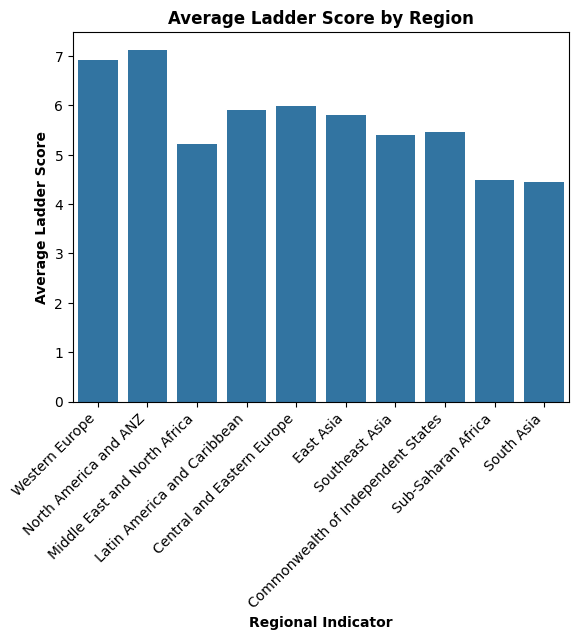

In [127]:
sns.barplot( x = 'Regional indicator'  , y = 'Ladder score' , data = df  , ci = None)
plt.xticks(rotation = 45 , ha = 'right')

plt.title("Average Ladder Score by Region" , fontweight='bold')
plt.xlabel("Regional Indicator" , fontweight='bold')
plt.ylabel("Average Ladder Score", fontweight='bold')

plt.show()

Wastern europe and North america and ANZ has the highest happiness score  
and sub-saharan africe and south asia has the least

<ipython-input-128-92139d1db780>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot( x = 'Regional indicator'  , y = 'Logged GDP per capita' , data = df  , ci = None)


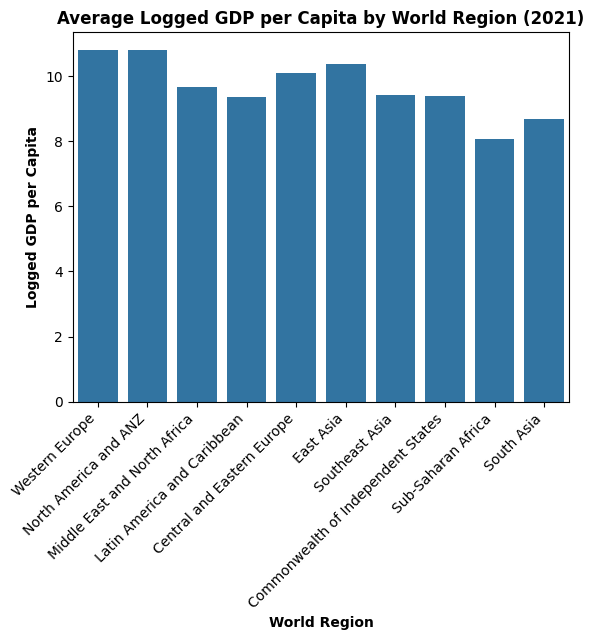

In [128]:
sns.barplot( x = 'Regional indicator'  , y = 'Logged GDP per capita' , data = df  , ci = None)
plt.xticks(rotation = 45 , ha = 'right')

plt.title("Average Logged GDP per Capita by World Region (2021)", fontweight='bold')
plt.xlabel("World Region", fontweight='bold')
plt.ylabel("Logged GDP per Capita", fontweight='bold')
plt.show()

same as above

<ipython-input-129-d78fbe4b09e4>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot( x = 'Regional indicator'  , y = 'Social support' , data = df  , ci = None)


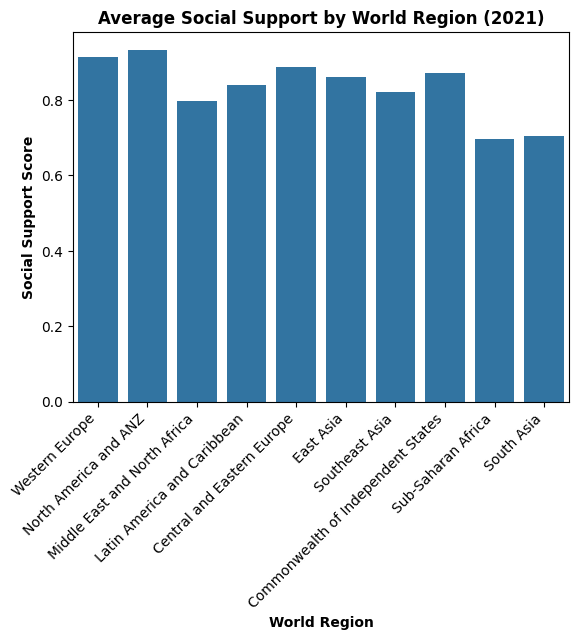

In [129]:
sns.barplot( x = 'Regional indicator'  , y = 'Social support' , data = df  , ci = None)
plt.xticks(rotation = 45 , ha = 'right')

plt.title("Average Social Support by World Region (2021)", fontweight='bold')
plt.xlabel("World Region", fontweight='bold')
plt.ylabel("Social Support Score", fontweight='bold')
plt.show()

same here too like above

<ipython-input-130-df8f1f6d9fca>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot( x = 'Regional indicator'  , y = 'Healthy life expectancy' , data = df  , ci = None)


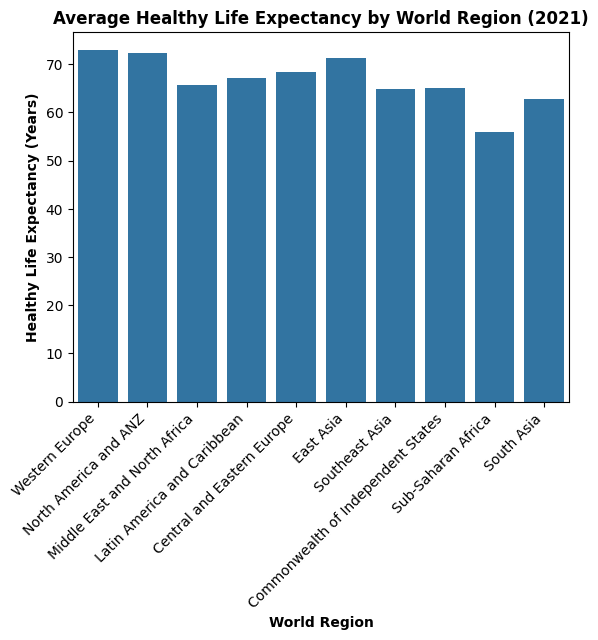

In [130]:
sns.barplot( x = 'Regional indicator'  , y = 'Healthy life expectancy' , data = df  , ci = None)
plt.xticks(rotation = 45 , ha = 'right')

plt.title("Average Healthy Life Expectancy by World Region (2021)", fontweight='bold')
plt.xlabel("World Region", fontweight='bold')
plt.ylabel("Healthy Life Expectancy (Years)", fontweight='bold')
plt.show()

almost similar relationship like above

<ipython-input-131-1257b4be1130>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot( x = 'Regional indicator'  , y = 'Freedom to make life choices' , data = df  , ci = None)


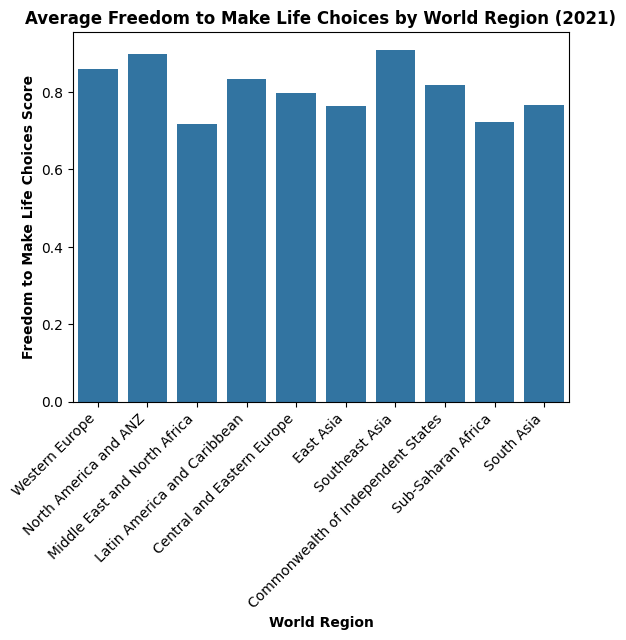

In [131]:
sns.barplot( x = 'Regional indicator'  , y = 'Freedom to make life choices' , data = df  , ci = None)
plt.xticks(rotation = 45 , ha = 'right')

plt.title("Average Freedom to Make Life Choices by World Region (2021)", fontweight='bold')
plt.xlabel("World Region", fontweight='bold')
plt.ylabel("Freedom to Make Life Choices Score", fontweight='bold')
plt.show()

southeast asia , north america and ANZ and western europe has the highest  
and middle east and north africa and sub-saharan africa has the lowest

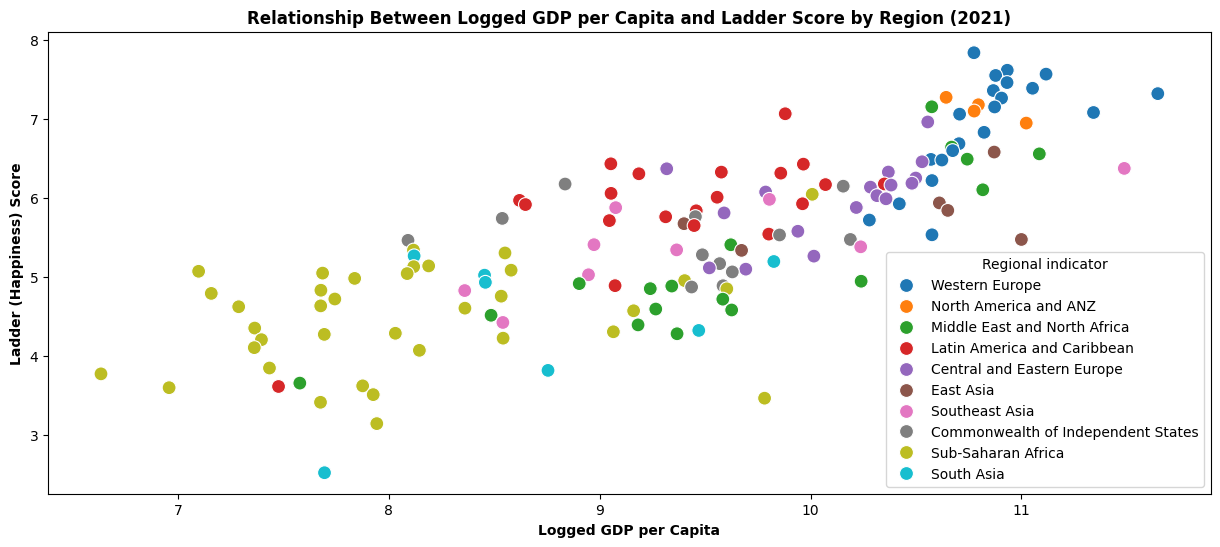

In [132]:
plt.figure(figsize = (15,6))
sns.scatterplot(x = 'Logged GDP per capita' , y = 'Ladder score' , data = df , hue = 'Regional indicator' , s = 100)

plt.title("Relationship Between Logged GDP per Capita and Ladder Score by Region (2021)", fontweight='bold')
plt.xlabel("Logged GDP per Capita", fontweight='bold')
plt.ylabel("Ladder (Happiness) Score", fontweight='bold')
plt.show()

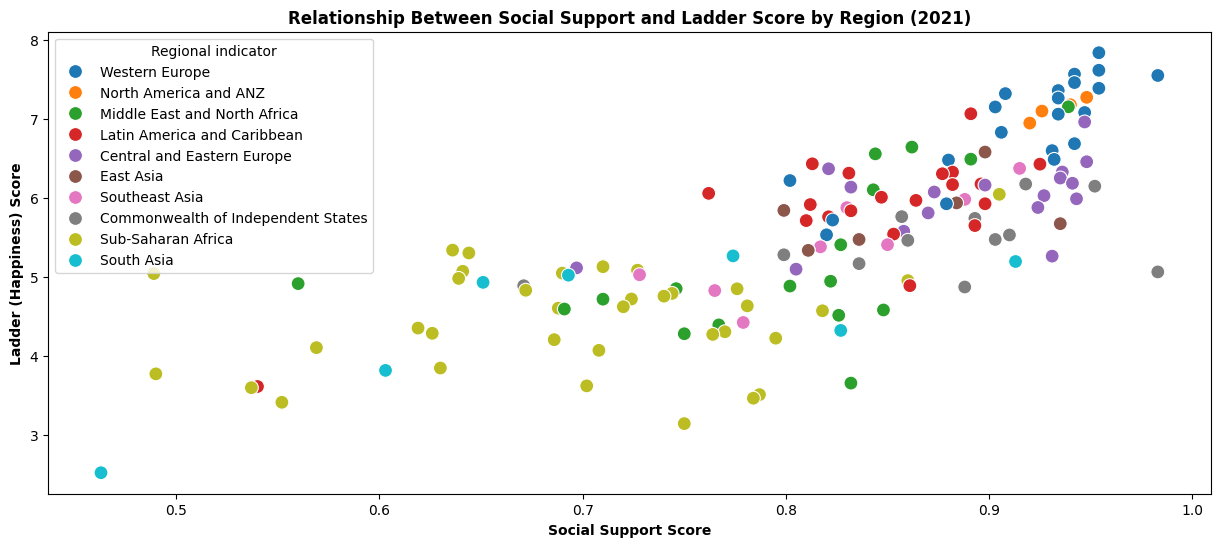

In [133]:
plt.figure(figsize = (15,6))
sns.scatterplot(x = 'Social support' , y = 'Ladder score' , data = df , hue = 'Regional indicator' , s = 100)

plt.title("Relationship Between Social Support and Ladder Score by Region (2021)", fontweight='bold')
plt.xlabel("Social Support Score", fontweight='bold')
plt.ylabel("Ladder (Happiness) Score", fontweight='bold')
plt.show()

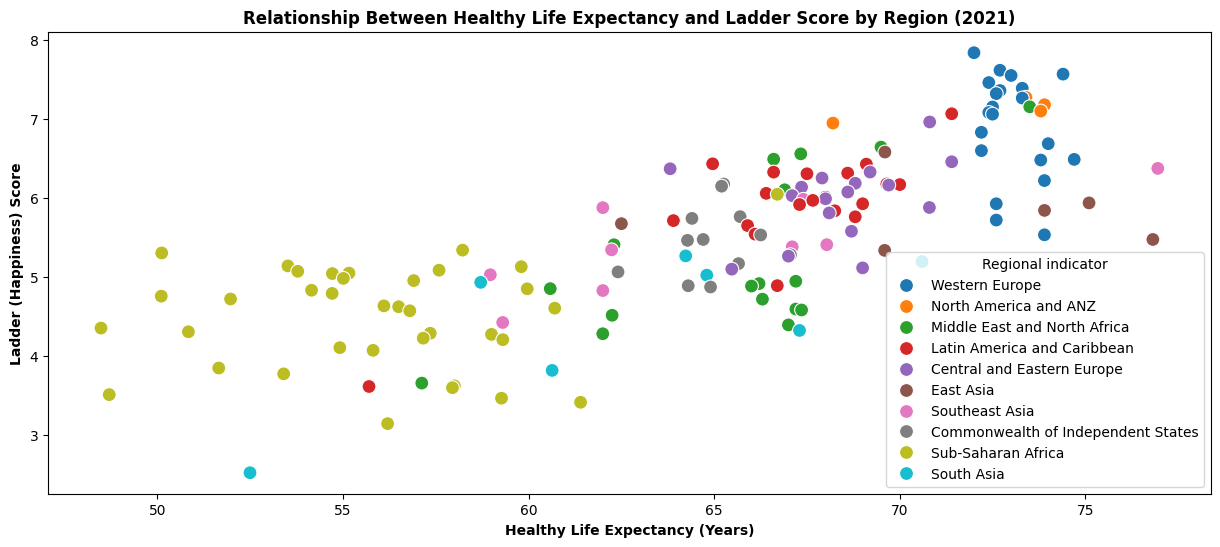

In [134]:
plt.figure(figsize = (15,6))
sns.scatterplot(x = 'Healthy life expectancy' , y = 'Ladder score' , data = df , hue = 'Regional indicator' , s = 100)

plt.title("Relationship Between Healthy Life Expectancy and Ladder Score by Region (2021)", fontweight='bold')
plt.xlabel("Healthy Life Expectancy (Years)", fontweight='bold')
plt.ylabel("Ladder (Happiness) Score", fontweight='bold')
plt.show()

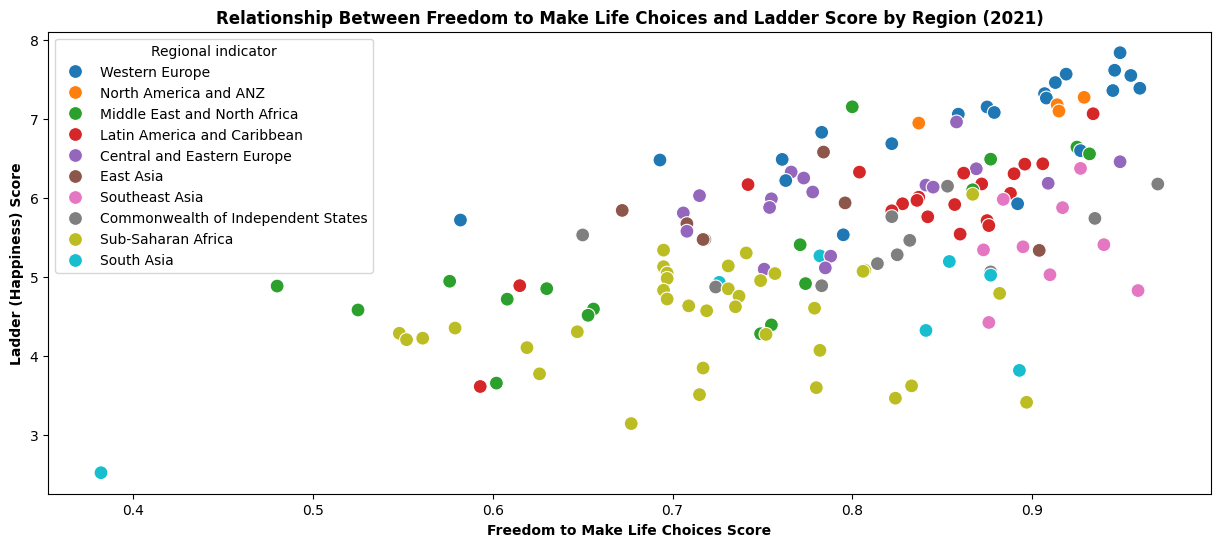

In [135]:
plt.figure(figsize = (15,6))
sns.scatterplot(x = 'Freedom to make life choices' , y = 'Ladder score' , data = df , hue = 'Regional indicator' , s = 100)

plt.title("Relationship Between Freedom to Make Life Choices and Ladder Score by Region (2021)", fontweight='bold')
plt.xlabel("Freedom to Make Life Choices Score", fontweight='bold')
plt.ylabel("Ladder (Happiness) Score", fontweight='bold')
plt.show()

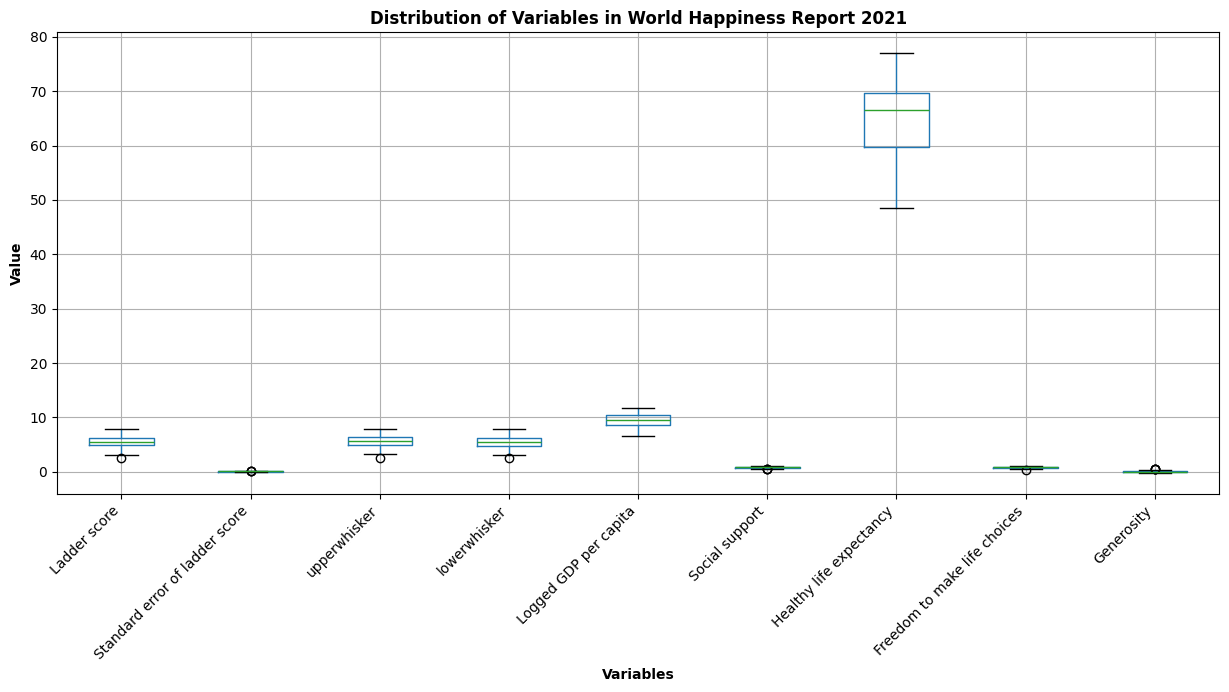

In [136]:
plt.figure(figsize = (15,6))
df.boxplot()
plt.xticks(rotation = 45 , ha = 'right')

plt.title("Distribution of Variables in World Happiness Report 2021", fontweight='bold')
plt.xlabel("Variables", fontweight='bold')
plt.ylabel("Value", fontweight='bold')
plt.show()

In [137]:
# seprating input and output features
x = df.iloc[: , 6:].values
y = df['Ladder score'].values

In [138]:
x.shape

(149, 5)

In [139]:
# performing OneHotEncoding on Regional indicator column

encoder = OneHotEncoder(drop = 'first' , dtype = np.int8)
x = np.hstack((x , encoder.fit_transform(df['Regional indicator'].values.reshape(-1,1)).toarray()))

In [140]:
# splitting dataset into training and testing data

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42)

In [141]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(119, 14)
(30, 14)
(119,)
(30,)


In [142]:
# training Linear Regression model

lr = LinearRegression()
lr.fit(x_train , y_train)

LinearRegression()

In [143]:
print(f'Training accuracy : {r2_score(y_train , lr.predict(x_train))}')
print(f'testing accuracy : {r2_score(y_test , lr.predict(x_test))}')

Training accuracy : 0.818658966953631
testing accuracy : 0.7300882272352885


In [144]:
# checking affect of Scaling

scaler = StandardScaler()
x = scaler.fit_transform(x)

In [145]:
x_train_scaled , x_test_scaled , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42)

In [146]:
# training linear regression model using scaled data

lr2 = LinearRegression()
lr2.fit(x_train_scaled , y_train)

print(f'Training accuracy : {r2_score(y_train , lr2.predict(x_train_scaled))}')
print(f'testing accuracy : {r2_score(y_test , lr2.predict(x_test_scaled))}')

Training accuracy : 0.818658966953631
testing accuracy : 0.7300882272352889


No difference

In [147]:
# training RandomForestRegressor model

rf = RandomForestRegressor(n_estimators = 30 , max_depth = 20)
rf.fit(x_train , y_train)

print(f'Training accuracy : {r2_score(y_train , rf.predict(x_train))}')
print(f'testing accuracy : {r2_score(y_test , rf.predict(x_test))}')

Training accuracy : 0.968790147873036
testing accuracy : 0.6856817021858636


In [148]:
# performing Clustering algorithm

km = KMeans(n_clusters = 4)
y_means = km.fit_predict(np.hstack((x ,y.reshape(149,1))))

In [149]:
y_means

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 3, 3, 1, 1, 1, 3, 3, 3, 1, 1, 1, 3, 1, 3, 1,
       1, 1, 2, 1, 3, 1, 1, 3, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 3, 1, 1, 3,
       1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 2, 3, 1, 2, 1,
       2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

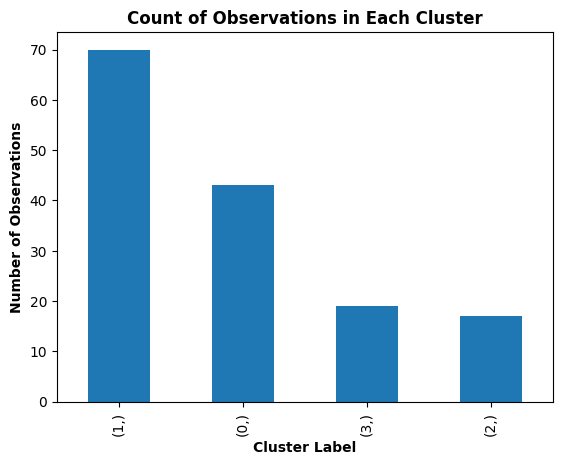

In [150]:
pd.DataFrame(y_means).value_counts().plot(kind = 'bar')

plt.title("Count of Observations in Each Cluster", fontweight='bold')
plt.xlabel("Cluster Label", fontweight='bold')
plt.ylabel("Number of Observations", fontweight='bold')
plt.show()

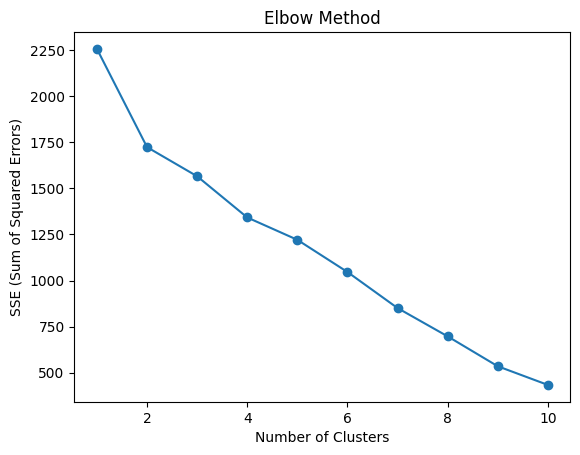

In [151]:
# finding best value for n_clusters

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(np.hstack((x ,y.reshape(149,1))))
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.title('Elbow Method')
plt.show()

In [152]:
km = KMeans(n_clusters = 4)
df['Cluster'] = km.fit_predict(np.hstack((x ,y.reshape(149,1))))

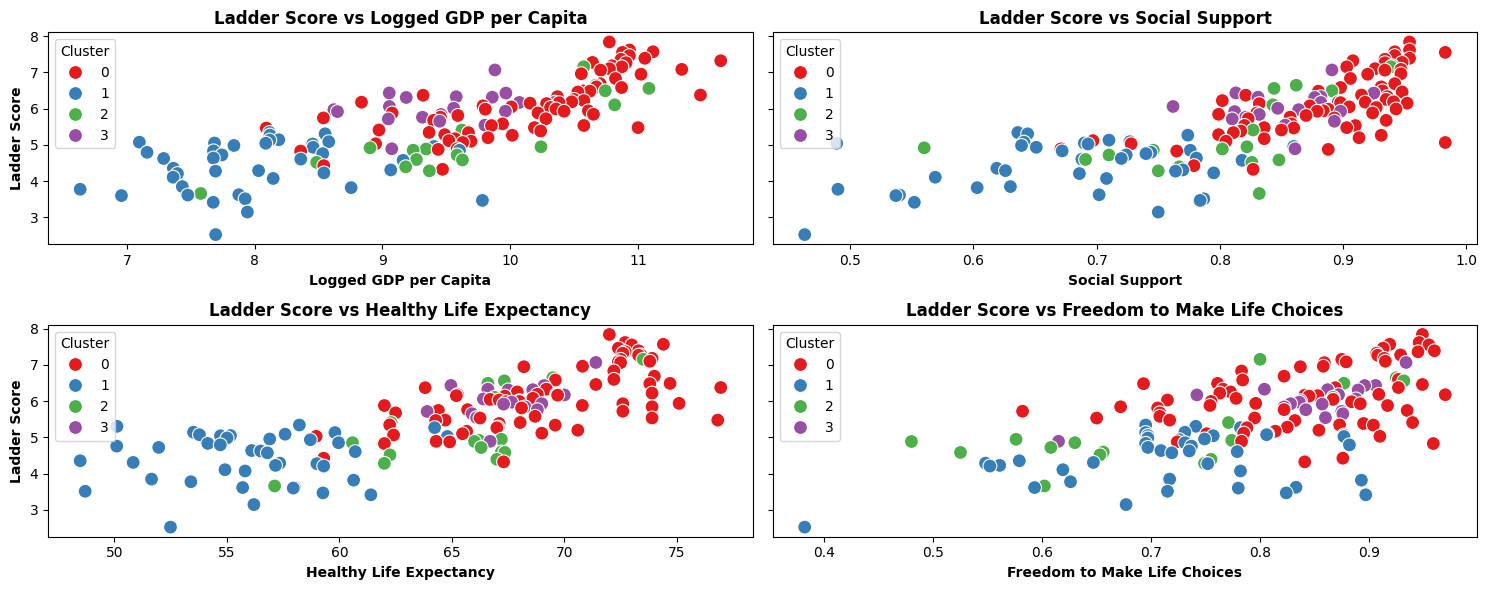

In [155]:
fig , axes = plt.subplots(nrows = 2, ncols = 2 , figsize = (15,6) , sharey = True)

axes = axes.flatten()

sns.scatterplot(x = 'Logged GDP per capita' , y = 'Ladder score' , data = df , hue = 'Cluster' , s = 100 , palette = 'Set1', ax = axes[0])
axes[0].set_title("Ladder Score vs Logged GDP per Capita", fontweight='bold')
axes[0].set_xlabel("Logged GDP per Capita", fontweight='bold')
axes[0].set_ylabel("Ladder Score", fontweight='bold')

sns.scatterplot(x = 'Social support' , y = 'Ladder score' , data = df , hue = 'Cluster' , s = 100 , palette = 'Set1', ax = axes[1])
axes[1].set_title("Ladder Score vs Social Support", fontweight='bold')
axes[1].set_xlabel("Social Support", fontweight='bold')
axes[1].set_ylabel("Ladder Score", fontweight='bold')

sns.scatterplot(x = 'Healthy life expectancy' , y = 'Ladder score' , data = df , hue = 'Cluster' , s = 100 , palette = 'Set1', ax = axes[2])
axes[2].set_title("Ladder Score vs Healthy Life Expectancy", fontweight='bold')
axes[2].set_xlabel("Healthy Life Expectancy", fontweight='bold')
axes[2].set_ylabel("Ladder Score", fontweight='bold')

sns.scatterplot(x = 'Freedom to make life choices' , y = 'Ladder score' , data = df , hue = 'Cluster' , s = 100 , palette = 'Set1', ax = axes[3])
axes[3].set_title("Ladder Score vs Freedom to Make Life Choices", fontweight='bold')
axes[3].set_xlabel("Freedom to Make Life Choices", fontweight='bold')
axes[3].set_ylabel("Ladder Score", fontweight='bold')

plt.tight_layout()  # automattically adjust the space

plt.show()

In [154]:
# exporting all import objects into pickle file

pickle.dump(encoder , open('encoder.pkl' , 'wb'))
pickle.dump(lr , open('lr.pkl' , 'wb'))

`ConClusion :` This analysis reveals that happiness scores are highest in regions with strong economic stability, social support, and health metrics. Prioritizing these factors can significantly enhance well-being across various regions.

Thank You